In [17]:
import pandas as pd
import numpy as np

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.metrics import mean_absolute_error, mean_squared_error

import seaborn as sns
import matplotlib.pyplot as plt


In [18]:
df = pd.read_json(
    "../data/problems_data.jsonl",
    lines=True
)

df.head()


,title,description,input_description,output_description,sample_io,problem_class,problem_score,url
0,Uuu,Unununium (Uuu) was the name of the chemical\n...,The input consists of one line with two intege...,The output consists of $M$ lines where the $i$...,"[{'input': '7 10', 'output': '1 2 2 3 1 3 3 4 ...",hard,9.7,https://open.kattis.com/problems/uuu
1,House Building,A number of eccentrics from central New York h...,"The input consists of $10$ test cases, which a...",Print $K$ lines with\n the positions of the...,"[{'input': '0 2 3 2 50 60 50 30 50 40', 'outpu...",hard,9.7,https://open.kattis.com/problems/husbygge
2,Mario or Luigi,Mario and Luigi are playing a game where they ...,,,"[{'input': '', 'output': ''}]",hard,9.6,https://open.kattis.com/problems/marioorluigi
3,The Wire Ghost,Žofka is bending a copper wire. She starts wit...,The first line contains two integers $L$ and $...,The output consists of a single line consistin...,"[{'input': '4 3 3 C 2 C 1 C', 'output': 'GHOST...",hard,9.6,https://open.kattis.com/problems/thewireghost
4,Barking Up The Wrong Tree,"Your dog Spot is let loose in the park. Well, ...",The first line of input consists of two intege...,Write a single line containing the length need...,"[{'input': '2 0 10 0 10 10', 'output': '14.14'...",hard,9.6,https://open.kattis.com/problems/barktree


Shape: (4112, 8)

Columns:
 Index(['title', 'description', 'input_description', 'output_description',
       'sample_io', 'problem_class', 'problem_score', 'url'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4112 entries, 0 to 4111
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   title               4112 non-null   object 
 1   description         4112 non-null   object 
 2   input_description   4112 non-null   object 
 3   output_description  4112 non-null   object 
 4   sample_io           4112 non-null   object 
 5   problem_class       4112 non-null   object 
 6   problem_score       4112 non-null   float64
 7   url                 4112 non-null   object 
dtypes: float64(1), object(7)
memory usage: 257.1+ KB


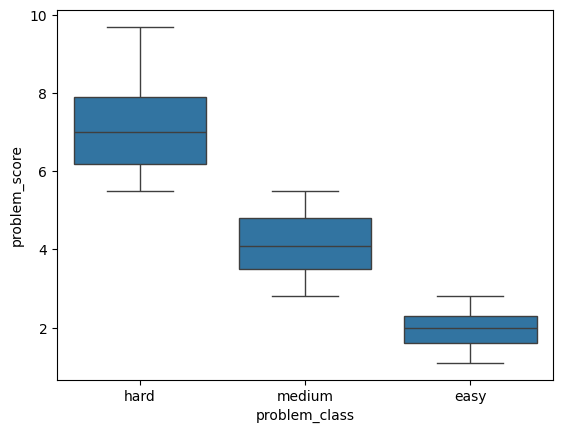

In [19]:
print("Shape:", df.shape)
print("\nColumns:\n", df.columns)

df.info()
# Missing values
df.isna().sum()
# Class distribution
df["problem_class"].value_counts()
# Score distribution
df["problem_score"].describe()
# Score vs class relationship
df.groupby("problem_class")["problem_score"].describe()
# Optional visualization
sns.boxplot(x="problem_class", y="problem_score", data=df)
plt.show()


In [20]:
text_cols = [
    "title",
    "description",
    "input_description",
    "output_description"
]
df[text_cols] = df[text_cols].fillna("")
df["combined_text"] = (
    df["title"] + " " +
    df["description"] + " " +
    df["input_description"] + " " +
    df["output_description"]
)
df["combined_text"] = df["combined_text"].str.lower()
df["combined_text"] = df["combined_text"].str.replace(r"\s+", " ", regex=True)
df["combined_text"] = df["combined_text"].str.strip()
df["combined_text"] = df["combined_text"].astype(str)

df["combined_text"].head()


0    uuu unununium (uuu) was the name of the chemic...
1    house building a number of eccentrics from cen...
2    mario or luigi mario and luigi are playing a g...
3    the wire ghost žofka is bending a copper wire....
4    barking up the wrong tree your dog spot is let...
Name: combined_text, dtype: object

In [21]:
tfidf = TfidfVectorizer(
    max_features=3000,
    ngram_range=(1, 2)
)

X = tfidf.fit_transform(df["combined_text"])

y_class = df["problem_class"]
y_score = df["problem_score"]

print("TF-IDF Matrix Shape:", X.shape)


TF-IDF Matrix Shape: (4112, 3000)


In [22]:
X_train, X_test, y_class_train, y_class_test, y_score_train, y_score_test = train_test_split(
    X,
    y_class,
    y_score,
    test_size=0.2,
    random_state=42,
    stratify=y_class
)
print("Train size:", X_train.shape)
print("Test size:", X_test.shape)


Train size: (3289, 3000)
Test size: (823, 3000)


In [23]:
clf = LogisticRegression(
    max_iter=1000,
    n_jobs=-1
)

clf.fit(X_train, y_class_train)

y_class_pred = clf.predict(X_test)

clf_acc = accuracy_score(y_class_test, y_class_pred)
clf_cm = confusion_matrix(y_class_test, y_class_pred)

print("Classification Accuracy:", clf_acc)
print("Confusion Matrix:\n", clf_cm)


Classification Accuracy: 0.4933171324422843
Confusion Matrix:
 [[ 33  67  53]
 [ 16 295  78]
 [ 18 185  78]]


/Users/romitsingh/open-projects/AutoJudge/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:1184: FutureWarning: 'n_jobs' has no effect since 1.8 and will be removed in 1.10. You provided 'n_jobs=-1', please leave it unspecified.
  warnings.warn(msg, category=FutureWarning)


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

y_score_pred = reg.predict(X_test)

mae = mean_absolute_error(y_score_test, y_score_pred)
mse = mean_squared_error(y_score_test, y_score_pred)
rmse = np.sqrt(mse)

print("Regression MAE:", mae)
print("Regression RMSE:", rmse)


NameError: name 'reg' is not defined

In [ ]:

score_max = df.groupby("problem_class")["problem_score"].max()
score_max = score_max.sort_values()

print("Score thresholds per class:")
print(score_max)
class_labels = score_max.index.tolist()

def score_to_class(score):
    for cls in class_labels:
        if score <= score_max[cls]:
            return cls
    return class_labels[-1]
y_class_from_reg = [score_to_class(s) for s in y_score_pred]

reg_class_acc = accuracy_score(y_class_test, y_class_from_reg)

print("Regression → Class Accuracy:", reg_class_acc)


Score thresholds per class:
problem_class
easy      2.8
medium    5.5
hard      9.7
Name: problem_score, dtype: float64
Regression → Class Accuracy: 0.43256379100850545


In [ ]:

print(f"Direct Classification Accuracy : {clf_acc:.4f}")
print(f"Regression RMSE               : {rmse:.2f}")
print(f"Regression → Class Accuracy   : {reg_class_acc:.4f}")


===== FINAL SUMMARY =====
Direct Classification Accuracy : 0.4933
Regression RMSE               : 2.02
Regression → Class Accuracy   : 0.4326
